Definice konstant

In [ ]:
OUTPUT_FILE = "output.csv"

MAX_VOLTAGE = 12000
MIN_VOLTAGE = 0

YEAR_COUNT = 525600

Funkce pro generovani casove rady

In [68]:
from datetime import datetime
from datetime import timedelta


def time_range(start=datetime.now(), step=1, count=YEAR_COUNT):

    time = []
    for i in range(count):
        delta = timedelta(minutes=(step * i))
        timestamp = start + delta
        timestamp = timestamp.timestamp()
        time.append(int(timestamp))

    return time    

Funkce pro generovani napetove rady

In [69]:
import random


def random_walk(min=MIN_VOLTAGE, max=MAX_VOLTAGE, count=YEAR_COUNT):

    voltage = []
    init_value = random.randint(min, max)
    voltage.append(init_value)

    for i in range(count - 1):

        direction = random.choice((-1,1))
        amplitude = random.gauss(1000, 100)
        last = voltage[-1]

        value = last + direction * amplitude

        if value < min:
            value = min
        if value > max:
            value = max
        
        voltage.append(int(value))
    
    return voltage

Funkce pro kontrolni vykresleni dat

In [70]:
import matplotlib.pyplot as plt
from pprint import pprint


def plot_data(time, voltage):

    pprint(list(zip(time[:5],voltage[:5])))
    print("...")

    plt.plot(time,voltage)
    plt.show()

Generovani dat

In [71]:
count = 10
time  = time_range(count=count)
voltage = random_walk(count=count)

Kontorlni vykresleni do grafu

[(1611142339, 10639),
 (1611142399, 9564),
 (1611142459, 8688),
 (1611142519, 7585),
 (1611142579, 8525)]
...


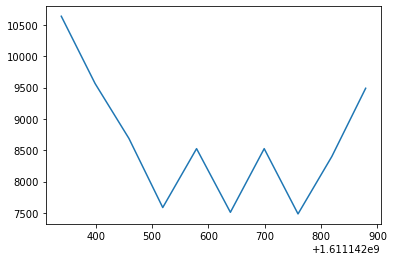

In [72]:
plot_data(time,voltage)

Funkce pro export dat do CSV

In [73]:
import csv


def write_data(filename, time, voltage):

    result = list(zip(time, voltage))
    with open(filename, 'w',  newline='') as file:
        writer = csv.writer(file, dialect='excel')
        writer.writerows(result)


Export dat

In [74]:
write_data(OUTPUT_FILE, time, voltage)

Funkce pro nacteni dat z CSV

In [79]:
def read_data(filename):

    with open(filename, 'r', newline='') as file:

        reader = csv.reader(file)
        data = list(reader)
        data = [
            [ int(time) for time, voltage in data ], 
            [ int(voltage) for time, voltage in data ]
       ] 
    
    return data

Nacteni dat a kontrolni vykresleni do grafu

[(1611142339, 10639),
 (1611142399, 9564),
 (1611142459, 8688),
 (1611142519, 7585),
 (1611142579, 8525)]
...


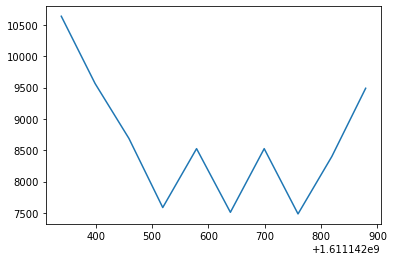

In [80]:
time, voltage = read_data(OUTPUT_FILE)
plot_data(time,voltage)